# IQ01 - TP3

## Exercice 2 : Algorithme de Simon

In [ ]:
import numpy as np

# Génération random de b
b = np.random.randint(0,2**3)
# Next, format 'b' as a binary string of length 3, padded with zeros:
b_str = format(b, '0'+str(3)+'b')

print(b_str)

000
0


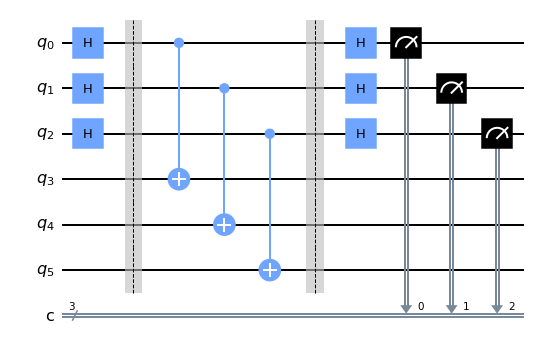

In [ ]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle


# b : chaîne de bits qui permet de définir le comportement que l'on veut de notre oracle
# Si b est composé uniquement de 0 alors le comportement est one-to-one, sinon c'est un comportement two-to-one
# Voir cellule précédente pour la génération aléatoire de la chaîne b
b = b_str

# n = longueur de b
n = len(b)
# On créé un circuit quantique avec 2*n qubits et n bits
simon_circuit = QuantumCircuit(n*2, n)

# Applique des portes H aux 3 premiers qubits, pour avoir des états superposés, qui représentent "l'entrée" de la fonction oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

# Appel de l'oracle, les 3 derniers qubits représentent "la sortie" de l'oracle et les 3 premiers "l'entrée"
# Le comportement de l'oracle dépend de la chaîne b, la disposition des CNOT dépend des 1 et 0 dans b
simon_circuit += simon_oracle(b)

# Apply barrier for visual separation
simon_circuit.barrier()

# Re-applique des portes H aux 3 premiers qubits
simon_circuit.h(range(n))

# Mesure des 3 premiers qubits, uniquement la mesure de ces qubits nous intéresse
simon_circuit.measure(range(n), range(n))
simon_circuit.draw('mpl')

/root/venv/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


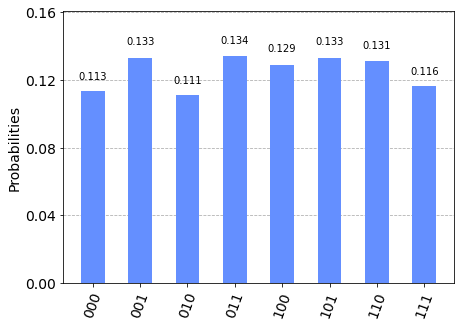

In [ ]:
# On affiche les états qu'on a mesuré, et leurs probas
# Si tous les états à 3 qubits on été mesuré alors forcément b='000' et donc le comportement de l'oracle est one-to-one
# Si seulement une sous-partie des états à 3 qubits a été mesuré, alors b!='000' et donc le comportement est two-to-one
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
# Avec le produit scalaire on peut bien vérifier que b scalaire chaque état z mesuré vaut 0 (b.z=0)
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

000.010 = 0 (mod 2)
000.001 = 0 (mod 2)
000.101 = 0 (mod 2)
000.110 = 0 (mod 2)
000.100 = 0 (mod 2)
000.000 = 0 (mod 2)
000.011 = 0 (mod 2)
000.111 = 0 (mod 2)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee1cbf87-7285-41f3-b185-437a373e9409' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>